Objective:To predict if the review is positive or negative
Training and testing dataset are given.
y-class
x-text
Naive Baye method

Initially we import the data and map the values of 1 and 0 to class.
Then we convert the text or document i.e data into an array. 
We split the data into x train and y train where x train is the features and y train is the class.


In [264]:
import pandas as pd
import numpy as np

In [265]:
df=pd.read_csv("movie_review_train.csv")

In [266]:
df['class']=df['class'].map({"Pos":1,"Neg":0})

In [267]:
df.head()

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


In [268]:
x_array=df.values

In [269]:
x_train=x_array[:,1]
y_train=x_array[:,0]
y_train=y_train.astype('int')

Here we need to convert the datatype of class which is either 1 or 0 into integer just to make sure!

In [270]:
print('x_train')
print(x_train)

x_train
[' a common complaint amongst film critics is   why aren t there more literate scripts available      quiz show gives signs of hope that the art of writing isn t dead in hollywood and that we need not only look to independent films for thoughtful content    paul attanasio s script takes what could have been a tepid thriller   the quiz show scandals of the late 50s   and delivers a telling parable about the emptiness of the post war american dream and the golden bubble that surrounds and protects tv networks and their sponsors    the film is riddled with telling symbols   e   g    a  58 chrysler   a radio announcement of sputnik   but is never heavy handed    deft direction by robert redford and keen performances by ralph fiennes   john turturro and rob morrow dovetail perfectly with the carefully honed script    redford departs from the usually overlight     cable tv quality   sets and camera work so common in recent 20th century period pieces    quiz show perfectly captures th

In [271]:
print('y_train')
print(y_train)

y_train
[1 1 1 ... 0 0 0]


We use the CountVectorizer function from feature_extraction.text to convert the array into a bag of words. We can get the feature names by using vec.get_feature_names.We can also specifiy upper and lower limit in the vectorizer as df_min and df_max respectively with the option to remove stop words we need to mention stop_words='english'.

In [272]:
from sklearn.feature_extraction.text import CountVectorizer

In [273]:
vec=CountVectorizer()

In [274]:
#fitting vectorizer on training data
vec.fit(x_train)
vec.vocabulary_

{'common': 6343,
 'complaint': 6419,
 'amongst': 1379,
 'film': 11923,
 'critics': 7439,
 'is': 16875,
 'why': 35407,
 'aren': 1839,
 'there': 32212,
 'more': 20840,
 'literate': 18743,
 'scripts': 28117,
 'available': 2351,
 'quiz': 25446,
 'show': 28864,
 'gives': 13369,
 'signs': 29019,
 'of': 22167,
 'hope': 15195,
 'that': 32168,
 'the': 32171,
 'art': 1958,
 'writing': 35819,
 'isn': 16903,
 'dead': 7967,
 'in': 15974,
 'hollywood': 15084,
 'and': 1457,
 'we': 35110,
 'need': 21440,
 'not': 21849,
 'only': 22295,
 'look': 18910,
 'to': 32570,
 'independent': 16117,
 'films': 11942,
 'for': 12399,
 'thoughtful': 32307,
 'content': 6831,
 'paul': 23237,
 'attanasio': 2205,
 'script': 28111,
 'takes': 31712,
 'what': 35283,
 'could': 7132,
 'have': 14515,
 'been': 2993,
 'tepid': 32066,
 'thriller': 32338,
 'scandals': 27828,
 'late': 18154,
 '50s': 313,
 'delivers': 8278,
 'telling': 31991,
 'parable': 23006,
 'about': 480,
 'emptiness': 10417,
 'post': 24373,
 'war': 34976,
 'amer

In [275]:
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['00', '000', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '101', '102', '103', '104', '105', '106', '107', '108', '10s', '10th', '11', '110', '113', '1138', '114', '115', '118', '11th', '12', '121', '122', '123', '127', '1272', '128', '129', '1298', '12th', '13', '130', '1305', '131', '132', '133', '135', '137', '139', '13th', '14', '140', '1400', '143', '144', '14th', '15', '150', '1500s', '150th', '151', '152', '153', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '1600s', '161', '165', '167', '16mm', '16th', '16x9', '17', '170', '1700s', '1709', '172', '175', '1773', '1791', '1792', '1793', '1794', '17th', '18', '180', '1800', '1800s', '1830s', '1839', '1847', '1862', '1865', '1869', '1871', '1885', '1888', '189', '1899', '18s', '18th', '19', '1900', '1903', '1908', '1912', '1913', '1914', '1916', '1919', '1920s', '1922', '1923', '1925', '1926', '1928', '1930', '1930s', '1932', '1934', '1935', '1937', '1938', '1939', '1940', '19

In [276]:
vec=CountVectorizer(stop_words='english',min_df=.03,max_df=0.8)
vec.fit(x_train)
vec.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [277]:
print(vec.get_feature_names())
print(len(vec.get_feature_names()))


['000', '10', '100', '13', '15', '1995', '1996', '1997', '1998', '1999', '20', '30', '80', '90', 'ability', 'able', 'absolutely', 'academy', 'accent', 'accept', 'accident', 'act', 'acted', 'acting', 'action', 'actions', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'adaptation', 'add', 'added', 'addition', 'adds', 'admit', 'adult', 'adults', 'adventure', 'affair', 'age', 'agent', 'ago', 'agree', 'agrees', 'ahead', 'air', 'albeit', 'alien', 'aliens', 'alive', 'allen', 'allow', 'allowed', 'allows', 'amazing', 'america', 'american', 'amusing', 'animated', 'animation', 'annoying', 'answer', 'anti', 'apart', 'apartment', 'apparent', 'apparently', 'appeal', 'appealing', 'appear', 'appearance', 'appears', 'appreciate', 'approach', 'appropriate', 'aren', 'army', 'arrives', 'art', 'artist', 'aside', 'ask', 'asked', 'asking', 'asks', 'aspect', 'aspects', 'ass', 'assistant', 'atmosphere', 'attack', 'attempt', 'attempts', 'attention', 'attitude', 'attractive', 'audience', 'audiences'

When we transform the matrix we get the sparse matrix which does not contain zeros and is a compressed format for easier computation. We use the command to .toarray() to get the ones and zeros back.

In [278]:
x_train_transformed=vec.transform(x_train)
x_train_transformed

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

In [279]:
#converting transformed matrix to an array
x_train=x_train_transformed.toarray()

In [280]:
pd.DataFrame(x_train_transformed.toarray(),columns=vec.get_feature_names()).head()

,000,10,100,13,15,1995,1996,1997,1998,1999,...,written,wrong,wrote,yeah,year,years,yes,york,young,younger
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
#test set
dn=pd.read_csv("movie_review_test.csv")

In [282]:
dn['class']=dn['class'].map({"Pos":1,"Neg":0})

In [283]:
dn.head()

,class,text
0,1,films adapted from comic books have had plent...
1,1,every now and then a movie comes along from a...
2,1,you ve got mail works alot better than it des...
3,1,jaws is a rare film that grabs your atte...
4,1,moviemaking is a lot like being the general m...


In [284]:
dn_array=dn.values

x_test=dn_array[:,1]
y_test=dn_array[:,0]
y_test=y_test.astype('int')

Here, while testing we only transform the dataset but do not use the fit function.

In [285]:
x_test_transformed=vec.transform(x_test)
x_test_transformed

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [286]:
x_test=x_test_transformed.toarray()

In [287]:
from sklearn.naive_bayes import MultinomialNB

In [288]:
mnb=MultinomialNB()

In Multinomial NB method we give the inputs as x_train and y_train. Here alpha is the term used for laplacian smoothing by default it is 1. This is used to prevent the condition of zero probability.

In [289]:
#fitting the model on training data
mnb.fit(x_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Here we use the function mnb.predict to get the class and mnb.predict_proba to get the probabilities.

In [290]:
y_pred=mnb.predict(x_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [291]:
pr=mnb.predict_proba(x_test_transformed)
pr

array([[4.72220911e-01, 5.27779089e-01],
       [1.46791072e-02, 9.85320893e-01],
       [8.06229525e-03, 9.91937705e-01],
       [3.82892252e-14, 1.00000000e+00],
       [9.99994569e-01, 5.43053306e-06],
       [2.06482974e-19, 1.00000000e+00],
       [1.84756956e-10, 1.00000000e+00],
       [4.41160693e-05, 9.99955884e-01],
       [6.34701076e-04, 9.99365299e-01],
       [2.15099949e-03, 9.97849001e-01],
       [1.67387911e-04, 9.99832612e-01],
       [1.53916508e-03, 9.98460835e-01],
       [9.42580804e-06, 9.99990574e-01],
       [3.94569247e-06, 9.99996054e-01],
       [1.30379599e-02, 9.86962040e-01],
       [4.95955521e-03, 9.95040445e-01],
       [4.87700524e-01, 5.12299476e-01],
       [4.84740721e-11, 1.00000000e+00],
       [1.45854901e-01, 8.54145099e-01],
       [9.79724905e-01, 2.02750951e-02],
       [1.52084321e-01, 8.47915679e-01],
       [1.09017591e-03, 9.98909824e-01],
       [9.99997220e-01, 2.78000287e-06],
       [8.18449930e-09, 9.99999992e-01],
       [2.546754

We import metrics from scikit package to build a confusion matrix and get the performance measures to check which model performs better. We need to ensure the specificity in this case must be high compared to accuracy and sensitivity.

In [292]:
from sklearn import metrics

In [293]:
metrics.accuracy_score(y_test,y_pred)

0.8275

In [294]:
confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[172,  28],
       [ 41, 159]], dtype=int64)

In [295]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [296]:
sensitivity=TP/float(TP+FN)
sensitivity

0.795

In [297]:
specificity=TN/float(TN+FP)
specificity

0.86

In [298]:
from sklearn.naive_bayes import BernoulliNB

In [299]:
bnb=BernoulliNB()

In [300]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [301]:
y_pre=bnb.predict(x_test)

In [302]:
ps=bnb.predict_proba(x_test)

In [303]:
metrics.accuracy_score(y_test,y_pre)

0.79

In [304]:
confuse=metrics.confusion_matrix(y_test,y_pre)
confuse

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [305]:
TN=confuse[0,0]
FP=confuse[0,1]
FN=confuse[1,0]
TP=confuse[1,1]

In [306]:
sensitivity=TP/float(TP+FN)
sensitivity

0.695

In [307]:
specificity=TN/float(TN+FP)
specificity

0.885

In [308]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pr[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

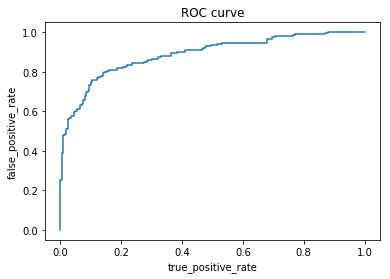

In [309]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)


In [310]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,ps[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

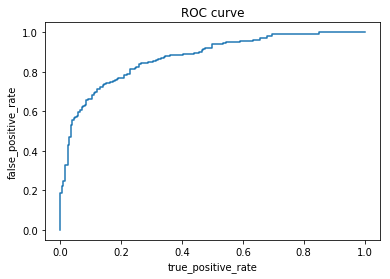

In [311]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.show()

If the area under the curve is greater then the model is good and if the ROC curve is hugging the y-axis this also means the model is good.